# EXERCÍCIO: ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

## Para este exercício, utilize o dataset sobre dados históricos das olimpíadas. Carregue os dados e faça o que se pede:

In [27]:
#Manipulação de Dados
import pandas as pd

#Visualisação
#import missingno
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning
#from sklearn.linear_model import LinearRegressi

In [2]:
df_atleta = pd.read_csv("arquivos/atletas-eventos.csv", decimal='.', thousands=',')
df_noc = pd.read_csv("arquivos/noc-regioes.csv")

In [3]:
df_atleta.rename(columns={"ID": "id_atleta", "Name": "nome_atleta", "Sex": "sexo_atleta", "Age": "idade", "Height": "altura_atleta",
                          "Weight": "peso_atleta", "Team": "equipe", "NOC": "noc", "Games": "ano_temporada", "Year": "ano", 
                          "Season": "temporada", "City": "cidade_sede", "Sport": "modalidade_esportiva", "Event": "evento",
                          "Medal": "medalha"}, inplace=True)

pegando apenas temporada verão

In [4]:
df_atleta["temporada"].nunique()

2

In [5]:
df_atleta["temporada"].unique()

array(['Summer', 'Winter'], dtype=object)

In [6]:
df_atleta = df_atleta[df_atleta["temporada"] == "Summer"]

In [7]:
df_atleta["temporada"].nunique()

1

In [8]:
df_atleta["temporada"].unique()

array(['Summer'], dtype=object)

In [9]:
df_atleta.describe().round(3)

,id_atleta,idade,altura_atleta,peso_atleta,ano
count,222552.000,213363.000,170695.000,168698.000,222552.000
mean,67998.926,25.674,175.516,70.689,1976.317
std,39139.038,6.700,10.915,14.804,30.943
min,1.000,10.000,127.000,25.000,1896.000
25%,34000.750,21.000,168.000,60.000,1956.000
50%,68302.500,24.000,175.000,70.000,1984.000
75%,101881.000,28.000,183.000,79.000,2000.000
max,135568.000,97.000,226.000,214.000,2016.000


In [10]:
df_atleta.describe(include="O")

,nome_atleta,sexo_atleta,equipe,noc,ano_temporada,temporada,cidade_sede,modalidade_esportiva,evento,medalha
count,222552,222552,222552,222552,222552,222552,222552,222552,222552,34088
unique,116122,2,1157,230,29,1,23,52,651,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,163109,14526,15064,13821,222552,22426,38624,5733,11459


## 1. Obtenha as estatísticas básicas do dataset (média, desvio padrão, máximos emínimos, distribuição, etc). O que elas dizem sobre os dados

In [11]:
df_atleta.describe()

,id_atleta,idade,altura_atleta,peso_atleta,ano
count,222552.000000,213363.000000,170695.000000,168698.00000,222552.000000
mean,67998.925712,25.674053,175.515551,70.68906,1976.317094
std,39139.038228,6.699839,10.914725,14.80394,30.942802
min,1.000000,10.000000,127.000000,25.00000,1896.000000
25%,34000.750000,21.000000,168.000000,60.00000,1956.000000
50%,68302.500000,24.000000,175.000000,70.00000,1984.000000
75%,101881.000000,28.000000,183.000000,79.00000,2000.000000
max,135568.000000,97.000000,226.000000,214.00000,2016.000000


## 2. Existem dados faltantes ou nulos? Se sim, quantos? (utilize funções como o duplicated, isna e/ou isnull do pandas);
 

In [12]:
df_atleta.isnull().sum()

id_atleta                    0
nome_atleta                  0
sexo_atleta                  0
idade                     9189
altura_atleta            51857
peso_atleta              53854
equipe                       0
noc                          0
ano_temporada                0
ano                          0
temporada                    0
cidade_sede                  0
modalidade_esportiva         0
evento                       0
medalha                 188464
dtype: int64

In [13]:
df_atleta[df_atleta.duplicated()]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


## 3. Realize uma análise de correlação dos atributos utilizando a matriz de correlações e gráficos de dispersão (você pode usar a função corr do pandas para obter a matriz). O que esses valores dizem sobre os dados? Você consegue encontrar evidências visuais das correlações através dos gráficos? Discorra sobre sua resposta.


In [14]:
df_atleta.corr()

,id_atleta,idade,altura_atleta,peso_atleta,ano
id_atleta,1.000000,-0.003815,-0.008731,-0.009440,0.007436
idade,-0.003815,1.000000,0.135298,0.210994,-0.131016
altura_atleta,-0.008731,0.135298,1.000000,0.794767,0.049840
peso_atleta,-0.009440,0.210994,0.794767,1.000000,0.018593
ano,0.007436,-0.131016,0.049840,0.018593,1.000000


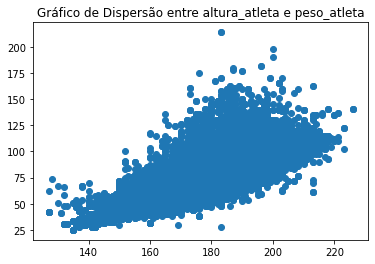

In [59]:
plt.scatter(x = df_atleta['altura_atleta'].values, y = df_atleta['peso_atleta'].values)
plt.title('Gráfico de Dispersão entre altura_atleta e peso_atleta')
plt.show()

## 4. Os dados possuem valores discrepantes (outliers)? Demonstre a existência ou não de outliers utilizando gráficos (dispersão, boxplot, etc);

<AxesSubplot:>

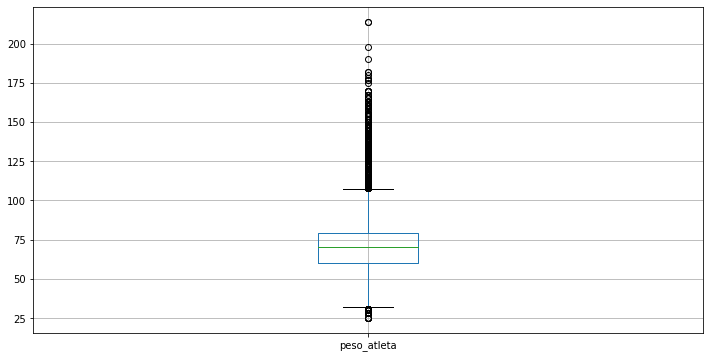

In [49]:
plt.figure(figsize=(12,6))
df_atleta.boxplot(["peso_atleta"])

## 5. Elabore pelo menos 3 questionamentos sobre os dados, fazendo uso de gráficos e manipulações do dataset para obter suas respostas. (exemplos: qual país obteve mais medalhas de ouro?, existiam mais atletas homens ou mulheres?). Discorra sobre seus achados.

Qual atleta ganhou mais medalhas ?

In [18]:
medal = df_atleta.groupby(by='nome_atleta').count()['medalha'].sort_values(ascending=False).head()

In [19]:
medal

nome_atleta
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Edoardo Mangiarotti                   13
Borys Anfiyanovych Shakhlin           13
Name: medalha, dtype: int64

<AxesSubplot:xlabel='nome_atleta'>

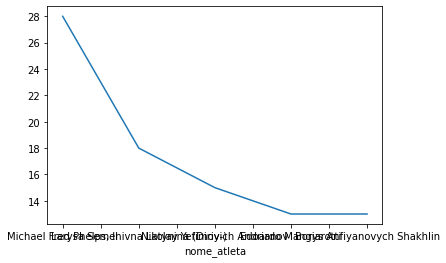

In [52]:
medal.plot(x='nome_atleta', y='medalha')


## Quem é o atleta mais velho?

In [58]:
df_atleta[df_atleta["idade"] == 97.0]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha,ouro
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,False


<AxesSubplot:>

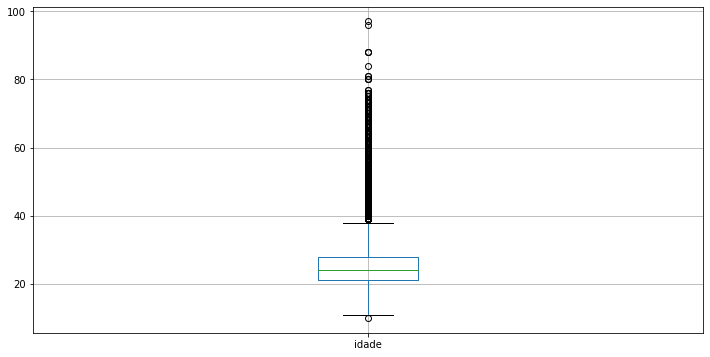

In [22]:
plt.figure(figsize=(12,6))
df_atleta.boxplot(["idade"])

## Quantos ateltas tem de cada sexo?

In [37]:
df_atleta["sexo_atleta"].value_counts()

M    163109
F     59443
Name: sexo_atleta, dtype: int64

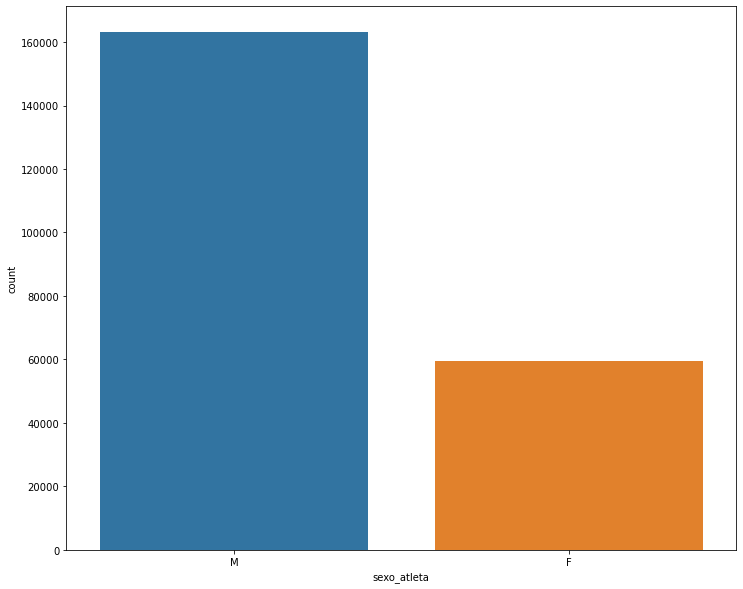

In [36]:
plt.figure(figsize=(12,10))
sns.countplot(x= "sexo_atleta", data=df_atleta)
plt.show()

# Análise de dados

In [61]:
df_atleta.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [58]:
df_atleta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
df_atleta.iloc[0]